# Calculate power for a t-test

In [2]:
# Import packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas as pd
#import seaborn as sns

In [3]:
# Set seaborn context
sns.set_style("white")
sns.set_context("talk", 
                font_scale=1)

In [4]:
# Parameters
effect_size = 0.5 # cohen's d
alpha = 0.05 # type I error rate
power = 0.8 # type II error rate
n_samples = np.array(range(2,101)) # number samples per group
# niter = 1000

In [5]:
# Calculate the threshold t-statistic
t_thres = sp.stats.t.isf(alpha/2,2*n_samples-2)

In [6]:
# Calculate resulting t-statistic with the desired effect size and power
#t_effect = effect_size*np.sqrt(n_samples)
t_effect = sp.stats.nct.isf(power,2*n_samples-2,nc=effect_size*np.sqrt(n_samples/2))

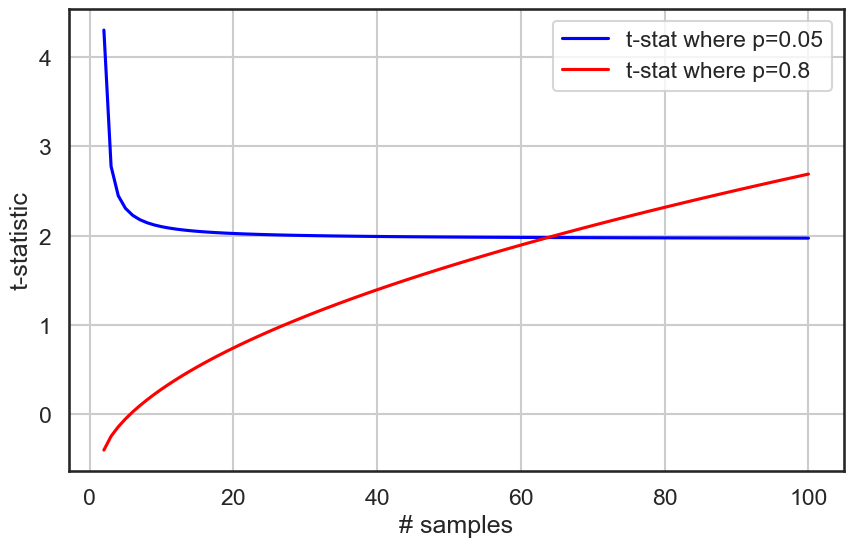

In [9]:
# Plot both curves
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_samples,t_thres,'b',label=f't-stat where p={alpha}')
ax.plot(n_samples,t_effect,'r',label=f't-stat where p={power}')
ax.set_xlabel('# samples')
ax.set_ylabel('t-statistic')
ax.legend()
ax.grid(True)
plt.show()
# The point where the effect crosses the threshold is the minimum sample size

In [10]:
# Identify smallest sample size where the effect crosses the threshold
min_idx = np.where(t_effect>t_thres)[0][0]
min_n = n_samples[min_idx]
min_t = t_effect[min_idx]
print(f"Minimum sample size: {min_n}")
print(f"t-statistic: {min_t}")

Minimum sample size: 64
t-statistic: 1.9842087716164023


In [11]:
pval = (1-sp.stats.t.cdf(min_t,2*min_n-2))*2
pwr_val = 1-sp.stats.nct.cdf(min_t,2*min_n-2,nc=effect_size*np.sqrt(min_n/2))
print(f"p-value: {pval}")
print(f"power: {pwr_val}")

p-value: 0.04940578920189487
power: 0.7999999999999999


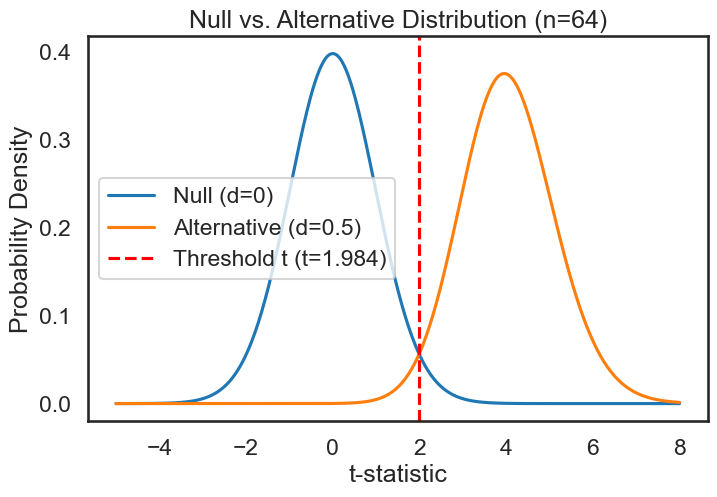

In [12]:
# Plot both the null distribution and the alternative distribution
n = min_n
# Null distribution: t with n-1 df, noncentrality=0
x = np.linspace(-5, 8, 500)
null_dist = sp.stats.t(df=n-1)
alt_dist = sp.stats.nct(df=n-1, nc=effect_size*np.sqrt(n))

plt.figure(figsize=(8,5))
plt.plot(x, null_dist.pdf(x), label='Null (d=0)')
plt.plot(x, alt_dist.pdf(x), label=f'Alternative (d={effect_size})')
plt.axvline(min_t, color='red', linestyle='--', label=f'Threshold t (t={min_t:.3f})')
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.title(f'Null vs. Alternative Distribution (n={n})')
plt.show()


### Example null and alternative distributions for a few sample sizes

1.0
Test power = 0.15215575705580986


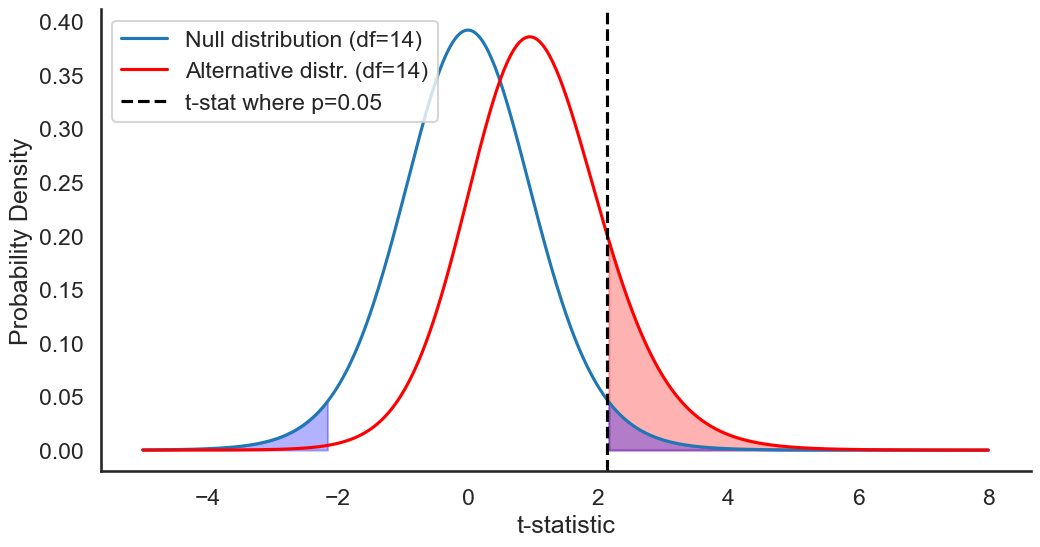

In [19]:
# Plot null vs alternative, small sample size
small_samplesize = 8
alt_cent = effect_size*np.sqrt(small_samplesize/2) # centrality parameter
print(alt_cent)
null_dist = sp.stats.t(df=(small_samplesize-1)*2)
alt_dist = sp.stats.nct(df=(small_samplesize-1)*2, nc=alt_cent)
t_typeI = null_dist.isf(alpha/2)
t_pwr = alt_dist.isf(power)
print(f'Test power = {1-alt_dist.cdf(t_typeI)}')

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(small_samplesize-1)*2})')
ax.plot(x, alt_dist.pdf(x), color='red', label=f'Alternative distr. (df={(small_samplesize-1)*2})')
ax.fill_between(x[x>t_typeI], alt_dist.pdf(x[x>t_typeI]), alpha=0.3, color='red')
ax.fill_between(x[x<-t_typeI], null_dist.pdf(x[x<-t_typeI]), alpha=0.3, color='blue')
ax.fill_between(x[x>t_typeI], null_dist.pdf(x[x>t_typeI]), alpha=0.3, color='blue')
#ax.fill_between(x[x>t_typeI], alt_dist.pdf(x[x>t_typeI]), alpha=0.5, edgecolor='black', 
   # facecolor='none', hatch='///')
#ax.axvline(t_pwr, color='red', linestyle='--', label=f't-stat where power=0.8')
ax.axvline(t_typeI, color='black', linestyle='--', label=f't-stat where p=0.05')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left')
plt.show()

Test power = 0.4099896034103423


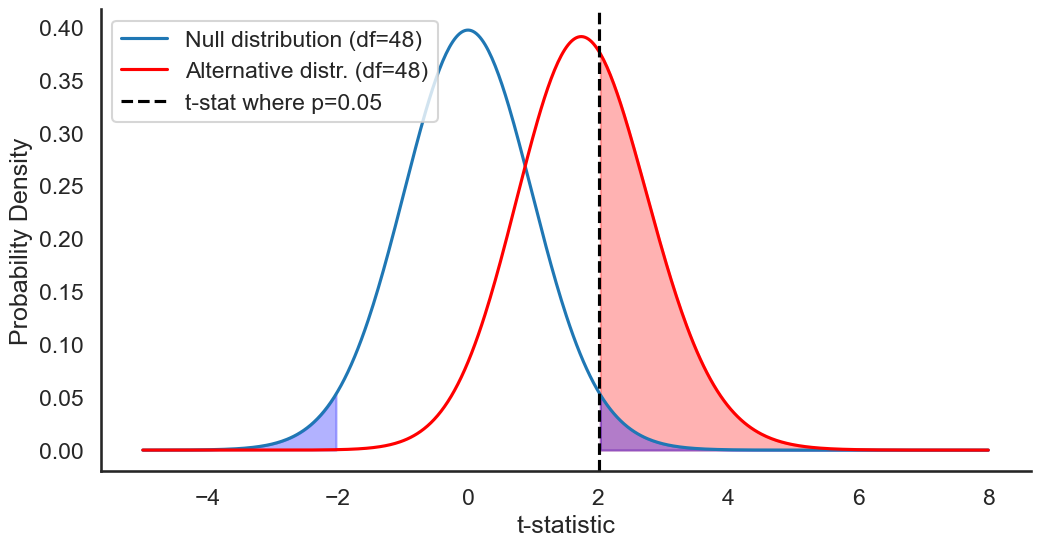

In [20]:
# Medium sample size
med_samplesize = 25
alt_cent = effect_size*np.sqrt(med_samplesize/2) # centrality parameter
null_dist = sp.stats.t(df=(med_samplesize-1)*2)
alt_dist = sp.stats.nct(df=(med_samplesize-1)*2, nc=alt_cent)
t_typeI = null_dist.isf(alpha/2)
t_pwr = alt_dist.isf(power)
print(f'Test power = {1-alt_dist.cdf(t_typeI)}')

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(med_samplesize-1)*2})')
ax.plot(x, alt_dist.pdf(x), color='red', label=f'Alternative distr. (df={(med_samplesize-1)*2})')
ax.fill_between(x[x>t_typeI], alt_dist.pdf(x[x>t_typeI]), alpha=0.3, color='red')
ax.fill_between(x[x<-t_typeI], null_dist.pdf(x[x<-t_typeI]), alpha=0.3, color='blue')
ax.fill_between(x[x>t_typeI], null_dist.pdf(x[x>t_typeI]), alpha=0.3, color='blue')
#ax.axvline(t_pwr, color='red', linestyle='--', label=f't-stat where power=0.8')
ax.axvline(t_typeI, color='black', linestyle='--', label=f't-stat where p=0.05')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left')
plt.show()

3.5355339059327378
Test power = 0.9404271823249811


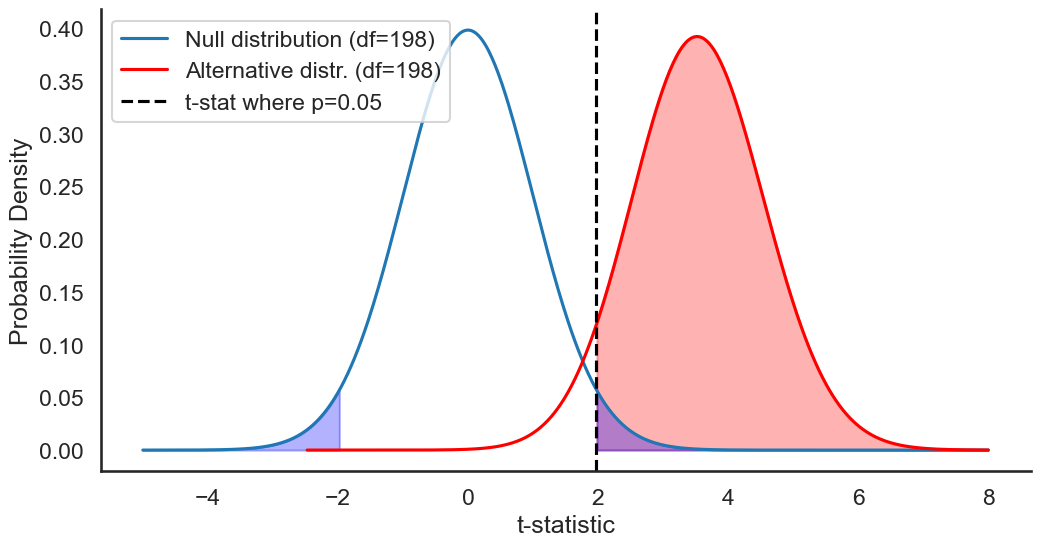

In [22]:
# Large sample size
large_samplesize = 100
alt_cent = effect_size*np.sqrt(large_samplesize/2) # centrality parameter
print(alt_cent)
null_dist = sp.stats.t(df=(large_samplesize-1)*2)
alt_dist = sp.stats.nct(df=(large_samplesize-1)*2, nc=alt_cent)
t_typeI = null_dist.isf(alpha/2)
t_pwr = alt_dist.isf(power)
print(f'Test power = {1-alt_dist.cdf(t_typeI)}')

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(large_samplesize-1)*2})')
ax.plot(x, alt_dist.pdf(x), color='red', label=f'Alternative distr. (df={(large_samplesize-1)*2})')
ax.fill_between(x[x>t_typeI], alt_dist.pdf(x[x>t_typeI]), alpha=0.3, color='red')
ax.fill_between(x[x<-t_typeI], null_dist.pdf(x[x<-t_typeI]), alpha=0.3, color='blue')
ax.fill_between(x[x>t_typeI], null_dist.pdf(x[x>t_typeI]), alpha=0.3, color='blue')
#ax.axvline(t_pwr, color='red', linestyle='--', label=f't-stat where power=0.8')
ax.axvline(t_typeI, color='black', linestyle='--', label=f't-stat where p=0.05')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left')
plt.show()

1.4142135623730951
Test power = 0.2902664045730202


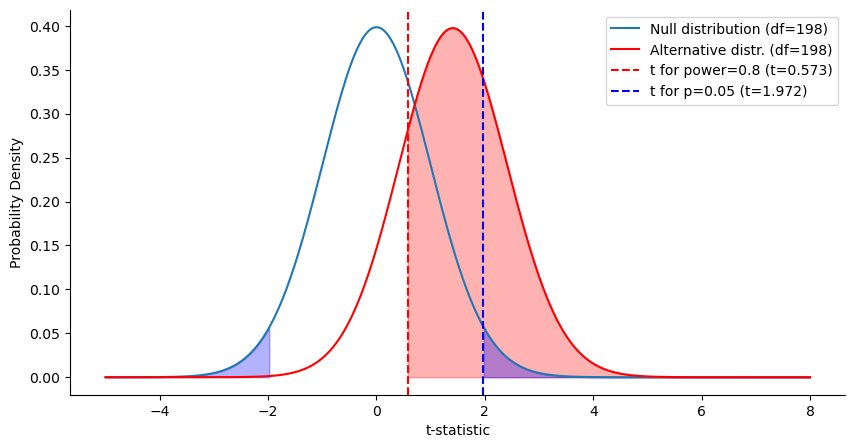

In [60]:
# Large sample size
vlarge_samplesize = 100
alt_cent = effect_size*np.sqrt(vlarge_samplesize/2) # centrality parameter
print(alt_cent)
null_dist = sp.stats.t(df=(vlarge_samplesize-1)*2)
alt_dist = sp.stats.nct(df=(vlarge_samplesize-1)*2, nc=alt_cent)
t_typeI = null_dist.isf(alpha/2)
t_pwr = alt_dist.isf(power)
print(f'Test power = {1-alt_dist.cdf(t_typeI)}')

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(vlarge_samplesize-1)*2})')
ax.plot(x, alt_dist.pdf(x), color='red', label=f'Alternative distr. (df={(vlarge_samplesize-1)*2})')
ax.fill_between(x[x>t_pwr], alt_dist.pdf(x[x>t_pwr]), alpha=0.3, color='red')
ax.fill_between(x[x<-t_typeI], null_dist.pdf(x[x<-t_typeI]), alpha=0.3, color='blue')
ax.fill_between(x[x>t_typeI], null_dist.pdf(x[x>t_typeI]), alpha=0.3, color='blue')
ax.axvline(t_pwr, color='red', linestyle='--', label=f't for power=0.8 (t={t_pwr:.3f})')
ax.axvline(t_typeI, color='blue', linestyle='--', label=f't for p=0.05 (t={t_typeI:.3f})')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right')
plt.show()

2.8284271247461903
Test power = 0.8014586233743859


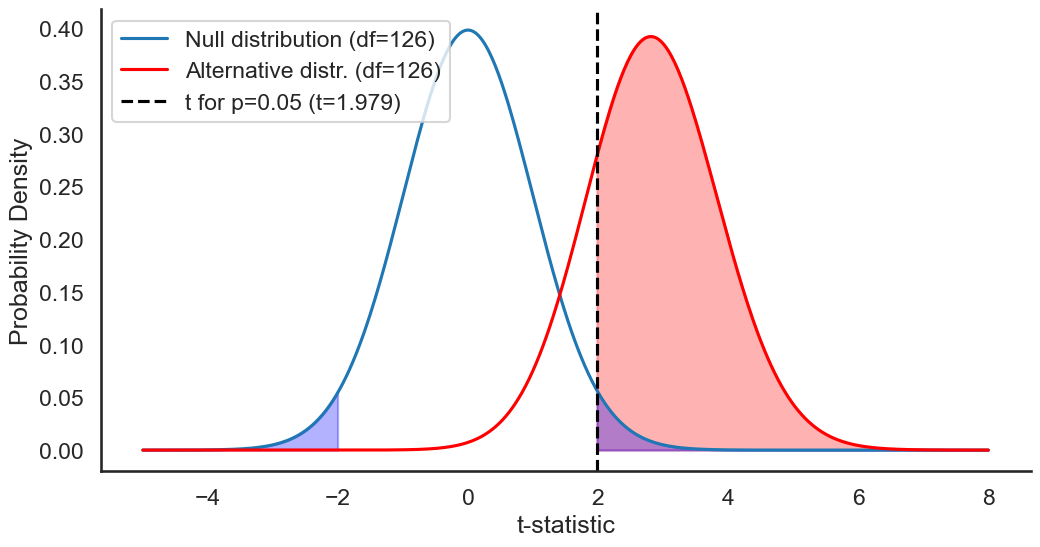

In [23]:
# Just-right sample size
jr_samplesize = 64
alt_cent = effect_size*np.sqrt(jr_samplesize/2) # centrality parameter
print(alt_cent)
null_dist = sp.stats.t(df=(jr_samplesize-1)*2)
alt_dist = sp.stats.nct(df=(jr_samplesize-1)*2, nc=alt_cent)
t_typeI = null_dist.isf(alpha/2)
t_pwr = alt_dist.isf(power)
print(f'Test power = {1-alt_dist.cdf(t_typeI)}')

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, null_dist.pdf(x), label=f'Null distribution (df={(jr_samplesize-1)*2})')
ax.plot(x, alt_dist.pdf(x), color='red', label=f'Alternative distr. (df={(jr_samplesize-1)*2})')
ax.fill_between(x[x>t_typeI], alt_dist.pdf(x[x>t_typeI]), alpha=0.3, color='red')
ax.fill_between(x[x<-t_typeI], null_dist.pdf(x[x<-t_typeI]), alpha=0.3, color='blue')
ax.fill_between(x[x>t_typeI], null_dist.pdf(x[x>t_typeI]), alpha=0.3, color='blue')
#ax.axvline(t_pwr, color='red', linestyle='--', label=f't for power=0.8 (t={t_pwr:.3f})')
ax.axvline(t_typeI, color='black', linestyle='--', label=f't for p=0.05 (t={t_typeI:.3f})')
ax.set_xlabel('t-statistic')
ax.set_ylabel('Probability Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper left')
plt.show()